# Prioritized Planning Max Flow

In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## PP max flow solver

In [16]:
import pickle
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from swarm_prm.solvers.macro.swarm_prm.gaussian_prm import GaussianPRM
from swarm_prm.solvers.macro.swarm_prm.prioritized_planning_max_flow import AbstractGraph, STAStar, PrioritizedPlanningMaxFlow

with open("gaussian_prm.pkl", "rb") as f:
    gaussian_prm = pickle.load(f)

agent_radius = 2
agent_count = 1000

graph = AbstractGraph(gaussian_prm, agent_radius, agent_count)


# Visualize Heuristic
def visualize_heuristic(gaussian_prm, heuristic):
    """
        Visualize Gaussian Nodes on the map
    """
    fig, ax = plt.subplots(figsize=(10, 10))

    # Visualize G nodes
    cmap = plt.get_cmap('coolwarm')
    for i, gaussian_node in enumerate(gaussian_prm.gaussian_nodes):
        gaussian_node.visualize(ax, edgecolor=cmap(heuristic[i]/20))

    for obs in gaussian_prm.map.obstacles:
        if obs.obs_type == "CIRCLE": 
            x, y = obs.get_pos()
            # ax.plot(x, y, 'ro', markersize=3)
            ax.add_patch(Circle((x, y), radius=obs.radius, color="black"))
        elif obs.obs_type == "POLYGON":
            x, y = obs.geom.exterior.xy
            ax.fill(x, y, fc="black")

    ax.set_aspect('equal')
    ax.set_xlim(left=0, right=gaussian_prm.map.width)
    ax.set_ylim(bottom=0, top=gaussian_prm.map.height)
    plt.show()


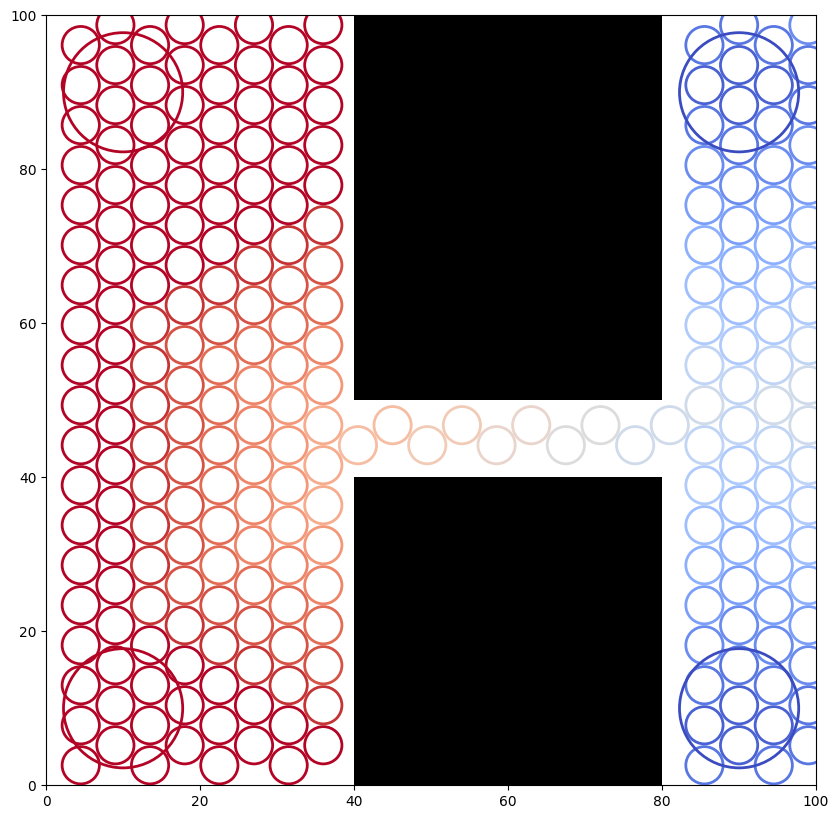

In [17]:
visualize_heuristic(gaussian_prm, graph.heuristic)

In [18]:
pp_maxflow = PrioritizedPlanningMaxFlow(gaussian_prm, agent_radius, agent_count)
paths = pp_maxflow.solve()

# import cProfile
# cProfile.run("pp_maxflow.solve()")

# macro_sol = gaussian_prm.get_macro_solution(flow_dict)
# print(macro_sol)
# simple_paths, gaussian_paths = gaussian_prm.get_solution(flow_dict, timestep, num_agent)
# with open("simple_paths.pkl", "wb") as f:
    # pickle.dump(simple_paths, f)

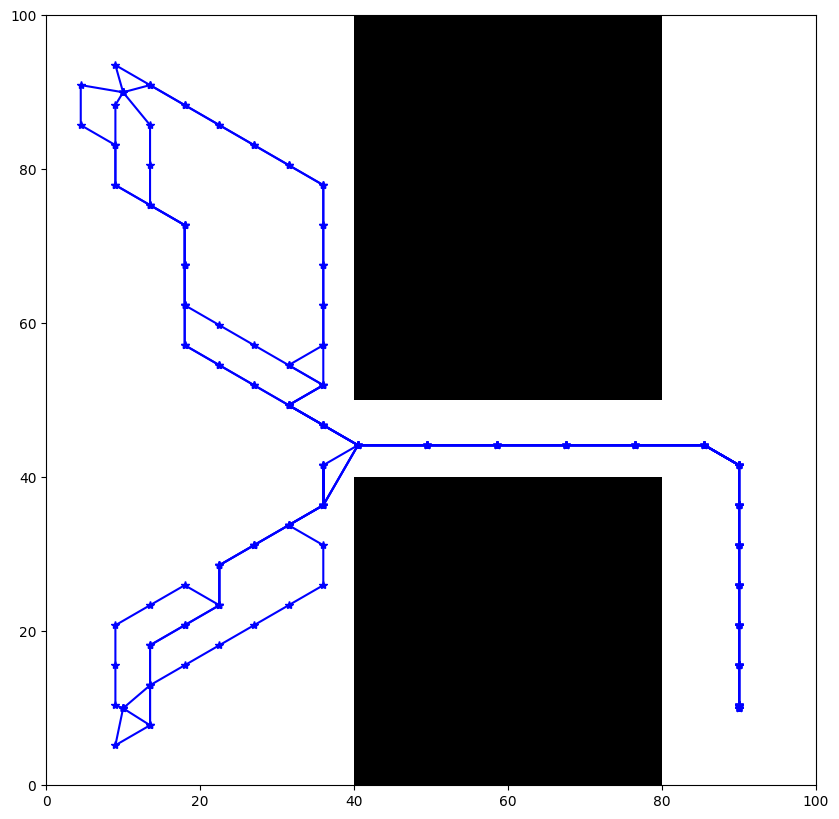

In [19]:
def visualize_paths(gaussian_prm, paths):
    """
        Visualize Gaussian Nodes on the map
    """
    fig, ax = plt.subplots(figsize=(10, 10))

    for path, _ in paths:
        nodes = [gaussian_prm.samples[node_idx] for node_idx in path]
        x = [node[0] for node in nodes]
        y = [node[1] for node in nodes]
        ax.plot(x, y, '-*', label='Path', color='blue')

    for obs in gaussian_prm.map.obstacles:
        if obs.obs_type == "CIRCLE": 
            x, y = obs.get_pos()
            # ax.plot(x, y, 'ro', markersize=3)
            ax.add_patch(Circle((x, y), radius=obs.radius, color="black"))
        elif obs.obs_type == "POLYGON":
            x, y = obs.geom.exterior.xy
            ax.fill(x, y, fc="black")

    ax.set_aspect('equal')
    ax.set_xlim(left=0, right=gaussian_prm.map.width)
    ax.set_ylim(bottom=0, top=gaussian_prm.map.height)
    return fig, ax

visualize_paths(gaussian_prm, paths)
plt.show()